# Projet 10

Problématique : Créer un chatbot

+++++ expliquer Luis

Nous disposons des dialogues Frames au format JSON.

Les données proviennent de ce site : https://www.microsoft.com/en-us/research/project/frames-dataset/download/

In [45]:
import pandas as pd

In [46]:
import sys
# Insert the path of modules folder
sys.path.insert(0, "Package")

# Import the module0 directly since
import Scripts_Analyse01 as pk
import Scripts_AnalyseMulti01 as pk_multi
import Scripts_AnalyseMulti02_Unsupervised as pk_multi_unsp
import Scripts_AnalyseMulti02_Supervised as pk_multi_sup

In [172]:
df = pd.read_json("data\\frames\\frames.json")

Regardons à quoi ressemble nos données

In [14]:
df

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
...,...,...,...,...,...
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,"{'userSurveyRating': 3.5, 'wizardSurveyTaskSuc..."
1365,U2AMZ8TLK,[{'text': 'I need to get to Fortaleza on Septe...,U260BGVS6,71b21b86-2d05-4372-a0ee-6ed64b0ddc42,"{'userSurveyRating': 4.5, 'wizardSurveyTaskSuc..."
1366,U231PNNA3,[{'text': 'We're finally going on vacation isn...,U21T9NMKM,ef2cd70e-c1f2-42be-8839-cb465af0bf41,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."


Nous avons 1 369 lignes et 5 variables. La variable "turns" contient les échanges avec le bot. <br>
Regardons plus en détail ce que contient ce champ sur un exemple

In [15]:
import gc

gc.collect()

0

In [53]:
df["turns"][0][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

In [34]:
df["turns"][0][0]["text"]

"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."

In [60]:
df["turns"][0][0]["labels"]["acts"][1]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

Le but est de reprendre la première intéraction et les parties "act" avec les intentions pour pouvoir envoyer ces informations à Luis.

## Construction de la base de données

Récupérons la première demande du client et les informations obtenues. Il se peut qu'on n'est aucune information lors de la première demande

In [16]:
df.head(2)

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."


In [173]:
df["text"] = df["turns"].apply(lambda x: x[0]["text"])

In [49]:
df.head(2)

,user_id,turns,wizard_id,id,labels,text
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go..."


In [174]:
df["acts"] = df["turns"].apply(lambda x: x[0]["labels"]["acts"][1] if len(x[0]["labels"]["acts"])>=2 else None)

In [190]:
df.tail(2)

,user_id,turns,wizard_id,id,labels,text,acts
1367,U2AMZ8TLK,"[{'text': 'Hi there, I'm looking for a place t...",U21DMV0KA,ffa79d2c-14eb-45e6-8573-b0817a1a1803,None,"Hi there, I'm looking for a place to get away ...","[{'args': [{'val': 'book', 'key': 'intent'}, {..."
1368,U2AMZ8TLK,[{'text': 'I need to book a trip for the whole...,U260BGVS6,0d364be2-9f43-4f5a-8506-1af4523515ba,"{'args': [{'val': 'Tampa', 'key': 'or_city'}, ...",I need to book a trip for the whole family fro...,"[{'args': [{'val': 'book', 'key': 'intent'}], ..."


In [175]:
def process_keyval(x, lib):
    if (x != None) and (len(x["args"]) >= 1):
        for v in x["args"]:
            if lib in v["key"]:
                return v["val"]
    else:
        return None

Nous avons besoin d'obtenir ces informations : <br>
- or_city (Ville de départ)
- dst_city (Ville de destination)
- str_date (Date aller souhaitée du vol)
- end_date (Date retour souhaitée du vol)
- budget (Budget maximum pour le prix total des billets)

In [176]:
df["dst_city"] = df["acts"].apply(lambda x: process_keyval(x, "dst_city"))

In [177]:
df["or_city"] = df["acts"].apply(lambda x: process_keyval(x, "or_city"))

In [178]:
df["str_date"] = df["acts"].apply(lambda x: process_keyval(x, "str_date"))

In [179]:
df["end_date"] = df["acts"].apply(lambda x: process_keyval(x, "end_date"))

In [180]:
df["budget"] = df["acts"].apply(lambda x: process_keyval(x, "budget"))

In [181]:
df.describe()

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget
count,1369,1369,1369,1369,1369,1369,1077,656,585,272,151,170
unique,11,1369,12,1369,16,1329,812,220,221,157,118,94
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",hi,"{'args': [{'val': 'book', 'key': 'intent'}], '...",-1,Kabul,August 27th,24th,-1
freq,345,1,301,1,929,10,214,18,14,10,3,15


Analysons d'abord nos données.

## Exploration des données

In [182]:
df["userSurveyRating"] = df["labels"].apply(lambda x: x["userSurveyRating"])

In [483]:
df.describe()

,userSurveyRating
count,1366.000000
mean,4.573419
std,0.839596
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


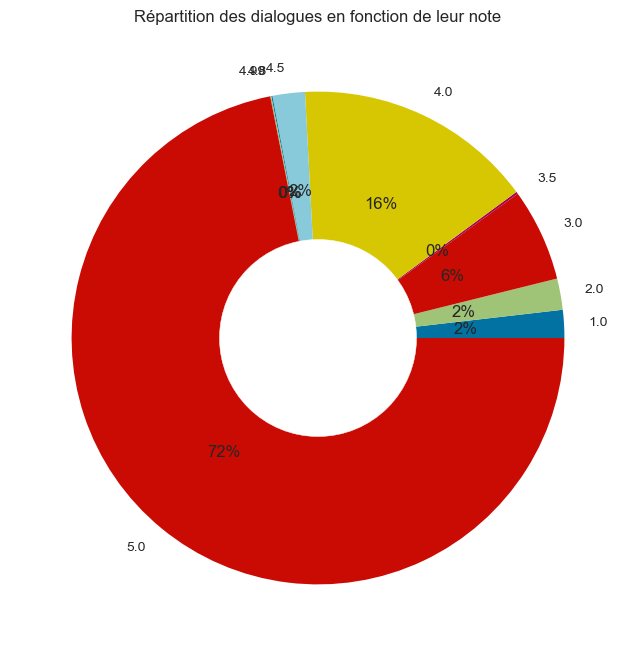

In [477]:
pk.graph_circle(df["userSurveyRating"], "userSurveyRating",
                 "Répartition des dialogues en fonction de leur note")

In [480]:
df["user_id"].nunique()

11

In [59]:
df.head(3)

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700,4.0
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",Mos Eisley,Gotham City,None,None,2100,3.0
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc...",Hello there i am looking to go on a vacation w...,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",Gotham City,None,None,None,None,2.0


11 utilisateurs.

In [485]:
df[df.select_dtypes(include=['object', 'string']).columns].describe()

,user_id,turns,wizard_id,id,labels,text,acts,budget,dst_city,or_city,str_date,end_date
count,1369,1369,1369,1369,1369,1369,1077,170,656,585,272,151
unique,11,1369,12,1369,16,1329,812,94,220,221,157,118
top,U22K1SX9N,[{'text': 'I'd like to book a trip to Atlantis...,U21T9NMKM,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",hi,"{'args': [{'val': 'book', 'key': 'intent'}], '...",-1,-1,Kabul,August 27th,24th
freq,345,1,301,1,929,10,214,15,18,14,10,3


In [ ]:
Villes les plus demandées depart (or_city) / arrivé (dst)

In [ ]:
mois les plus demandé str_date

## Envoies des données à Luis

In [60]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce

import json, time, uuid

In [61]:
authoringKey = 'c06a2fb95f4e4055b23bbbbcb2730622'
authoringEndpoint = 'https://luisappproject10weu001-authoring.cognitiveservices.azure.com/'
predictionKey = '8eb6e2eaf7684047ae5a8105969b1f95'
predictionEndpoint = 'https://luis-appproject10-weu-001.cognitiveservices.azure.com/'

In [62]:
client = LUISAuthoringClient(authoringEndpoint, CognitiveServicesCredentials(authoringKey))

In [349]:
app_id = "b8e7bfb7-3f7b-4b54-ab93-6075d28e2eb1"
app_name = "app-project10fly-weu-001"
version_id = 0.1

In [70]:
client.model

In [346]:
client.model.add_intent(app_id, version_id, "bookFlight")

'5bb593a1-809a-44ee-ba68-39bd91e3fbd8'

In [350]:
modelId = '5bb593a1-809a-44ee-ba68-39bd91e3fbd8'

Ajoutons les entités nécessaire : dst_city,	or_city, str_date, end_date, budget

Commençons par les entités préconstruites : number et date

In [ ]:
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["number"])
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["datetimeV2"])

In [74]:
client.model.add_prebuilt(app_id, version_id, prebuilt_extractor_names=["geographyV2"])

In [75]:
# define machine-learned entity
mlEntityDefinition = [
{
    "name": "dst_city",
    "children": [
        { "name": "city" }
    ]
},
{
    "name": "or_city",
    "children": [
        { "name": "city" }
    ]
},
{
    "name": "str_date",
    "children": [
        { "name": "date" }
    ]
},
{
    "name": "end_date",
    "children": [
        { "name": "date" }
    ]
},
{
    "name": "budget",
    "children": [
        { "name": "value" }
    ]
}]


In [76]:
for i in mlEntityDefinition:
    print(i)

{'name': 'dst_city', 'children': [{'name': 'city'}]}
{'name': 'or_city', 'children': [{'name': 'city'}]}
{'name': 'str_date', 'children': [{'name': 'date'}]}
{'name': 'end_date', 'children': [{'name': 'date'}]}
{'name': 'budget', 'children': [{'name': 'value'}]}


In [ ]:
# add entity to app
modelId = client.model.add_entity(app_id, version_id, name="Book Flight", children=mlEntityDefinition)

Mettre en forme le format des entités

In [78]:
def get_grandchild_id(model, childName, grandChildName):
    theseChildren = next(filter((lambda child: child.name == childName), model.children))
    theseGrandchildren = next(filter((lambda child: child.name == grandChildName), theseChildren.children))
    grandChildId = theseGrandchildren.id
    return grandChildId

Définissons du format des entités enfants

In [79]:
# Get entity and subentities
modelObject = client.model.get_entity(app_id, version_id, modelId)

In [80]:
entityIdAll = []

for i in mlEntityDefinition:
    id = get_grandchild_id(modelObject, i["name"], i["children"][0]["name"])
    entityIdAll.append({"name":i["children"][0]["name"], "id": id})

In [168]:
entityIdAll

[{'name': 'city', 'id': '69034a70-3871-4151-b62c-c5854b16e546'},
 {'name': 'city', 'id': 'ad027ed3-3267-499a-9cab-d85821301bd6'},
 {'name': 'date', 'id': '4967ddec-ea9d-4c43-bacd-9ab028562b89'},
 {'name': 'date', 'id': '0a966ff7-9869-43a2-a487-687b1af822ab'},
 {'name': 'value', 'id': '0292f28e-8ccb-4d02-ab22-50ba3a8baf37'}]

In [82]:
number = { "model_name": "number" }
datetimeV2 = { "model_name": "datetimeV2" }
geographyV2 = { "model_name": "geographyV2" }

In [83]:
for item in entityIdAll:
    if item["name"]=='city':
        client.features.add_entity_feature(app_id, version_id, item["id"], geographyV2)
    elif item["name"]=='date':
        client.features.add_entity_feature(app_id, version_id, item["id"], datetimeV2)
    elif item["name"]=='value':
        client.features.add_entity_feature(app_id, version_id, item["id"], number)

In [84]:
intentName = "bookFlight"

In [339]:
import re
print ([m.start(0) for m in re.finditer(re.escape('1700'), df_test["text"][0])])

[117]


Maintenant que nous avons créé notre schéma, nous pouvons importer les exemples de notre base.

In [183]:
df.head(10)

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700,4.0
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",Mos Eisley,Gotham City,None,None,2100,3.0
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc...",Hello there i am looking to go on a vacation w...,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",Gotham City,None,None,None,None,2.0
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hi I'd like to go to Caprica from Busan, betwe...","{'args': [{'val': 'Caprica', 'key': 'dst_city'...",Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",None,5.0
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a trip for 2 adult...","{'args': [{'val': '6', 'key': 'n_children'}, {...",Denver,Kochi,None,None,"$21,300",5.0
5,U21RP4FCY,"[{'text': 'Hey, i Want to go to St. Louis on t...",U21E0179B,bbd17a54-bc6c-4237-8f72-4778081fab0c,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hey, i Want to go to St. Louis on the 17th of ...","{'args': [{'val': 'St. Louis', 'key': 'dst_cit...",St. Louis,None,17th of August,None,None,3.0
6,U22HTHYNP,[{'text': 'I'm looking for a trip to Gotham Ci...,U21DKG18C,660f2f7a-b660-4f2c-aae9-e5cdb28d818c,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'm looking for a trip to Gotham City leaving ...,"{'args': [{'val': 'Gotham City', 'key': 'dst_c...",Gotham City,Kakariko Village,"Saturday, August 13, 2016",None,$2400 USD,4.0
7,U21E41CQP,"[{'text': 'Hello, I would like to book a 2-wee...",U21DMV0KA,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...","Hello, I would like to book a 2-week trip leav...","{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,None,None,None,4.0
8,U21RP4FCY,"[{'text': 'Hello, I am planning to book a trip...",U21E0179B,3f238ba1-c385-415a-a511-998330c03750,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...","Hello, I am planning to book a trip to pittsborgh","{'args': [{'val': 'pittsborgh', 'key': 'dst_ci...",pittsborgh,None,None,None,None,4.0
9,U22HTHYNP,"[{'text': 'Hi, I need to go to Mos Eisley for ...",U21DKG18C,45f2dfa5-d8ad-4f33-8994-68bc040e6901,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hi, I need to go to Mos Eisley for a wedding, ...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",Mos Eisley,None,"Saturday, August 13, 2016","Tuesday, August 16, 2016",$3700,5.0


Splitons notre dataframe en train, test

In [307]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [184]:
def start_text_idx(search, text):
    if search is None or text is None:
        return 0
    else:
        return [m.start(0) for m in re.finditer(re.escape(search), text)][0]

In [185]:
def end_text_idx(search, text):
    if search is None or text is None:
        return 0
    else:
        return [m.end(0) for m in re.finditer(re.escape(search), text)][0]

In [186]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [187]:
for lab in mlEntityDefinition:
    print(lab["children"][0]["name"])

city
city
date
date
value


In [257]:
df_test = df.head(100)

In [192]:
mlEntityDefinition


[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [306]:
string = "freeCodeCamp"
print(string[0:len(string)])

freeCodeCamp


In [339]:
import re

def children_add(item):
    tab = []
    tab_children = []
    text = item["text"].lower()
    for lab in mlEntityDefinition:
        if (item["acts"] is None) or (text is None) or item[lab["name"]]==-1:
            print("None")

        elif item[lab["name"]] is None or item[lab["name"]]=="-1" or item[lab["name"]]=="ASAP":
            print("None")
        else:
            value = item[lab["name"]].lower()
            child = {
                'children': [
                            {
                                "startCharIndex": start_text_idx(value, text),
                                "endCharIndex": end_text_idx(value, text),
                                'entityName': lab["children"][0]["name"]
                            }]
            }
            if child in tab_children:
                print("child present")
            else:
                label = {   
                            "startCharIndex": start_text_idx(value, text),
                            "endCharIndex": end_text_idx(value, text),
                            'entityName': lab["name"],
                            'children': [
                                {
                                    "startCharIndex": start_text_idx(value, text),
                                    "endCharIndex": end_text_idx(value, text),
                                    'entityName': lab["children"][0]["name"]
                                }]
                        }
                tab.append(label)
                tab_children.append(child)
    return tab

In [319]:
df_test["luis"] = df_test.apply(children_add, axis=1)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [320]:
df_test.head(2)

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating,luis
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700,4.0,"[{'startCharIndex': 27, 'endCharIndex': 35, 'e..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",Mos Eisley,Gotham City,None,None,2100,3.0,"[{'startCharIndex': 59, 'endCharIndex': 69, 'e..."


In [340]:
df["luis"] = df.apply(children_add, axis=1)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [252]:
df.head(2)

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating,luis
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",I'd like to book a trip to Atlantis from Capri...,"{'args': [{'val': 'Atlantis', 'key': 'dst_city...",Atlantis,Caprica,"Saturday, August 13, 2016",None,1700,4.0,"[{'startCharIndex': 27, 'endCharIndex': 35, 'e..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc...","Hello, I am looking to book a vacation from Go...","{'args': [{'val': 'Mos Eisley', 'key': 'dst_ci...",Mos Eisley,Gotham City,None,None,2100,3.0,"[{'startCharIndex': 59, 'endCharIndex': 69, 'e..."


In [378]:
df["luis_2"] = df["luis"].apply(lambda x: True if len(x)>0 else False)

In [380]:
df[df["luis_2"]==False]

,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating,luis,luis_2
7,U21E41CQP,"[{'text': 'Hello, I would like to book a 2-wee...",U21DMV0KA,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...","Hello, I would like to book a 2-week trip leav...","{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,None,None,None,4.0,[],False
22,U22HTHYNP,[{'text': 'Hi. I'm looking for an adventure fr...,U21DMV0KA,97de8f35-8109-4530-9711-60d672a0fc28,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Hi. I'm looking for an adventure from Thursday...,None,None,None,None,None,None,5.0,[],False
25,U22HTHYNP,[{'text': 'Hi. I live in Busan and I'd like to...,U21DMV0KA,b1466ef4-a4aa-47d6-90ef-758dbfe56874,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Hi. I live in Busan and I'd like to go to Las ...,None,None,None,None,None,None,5.0,[],False
32,U21E41CQP,"[{'text': 'Hello, I have 15 vacation days avai...",U21DKG18C,12a5fe96-1951-46ff-b29d-952712c1b74c,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hello, I have 15 vacation days available betwe...",None,None,None,None,None,None,5.0,[],False
35,U22HTHYNP,[{'text': 'Hey! You can help me by finding a t...,U21DMV0KA,40551217-d25f-43f8-99d6-35d08e03815a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Hey! You can help me by finding a trip to Phil...,None,None,None,None,None,None,5.0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,U231PNNA3,[{'text': 'I need to book a business trip for ...,U21T9NMKM,fc28b01c-92ab-475f-aa9d-d3f108448293,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",I need to book a business trip for 4 potential...,None,None,None,None,None,None,5.0,[],False
1359,U231PNNA3,[{'text': 'My name is Stephen King and I want ...,U21T9NMKM,42ff2fb5-4523-437c-9eaf-5d5e65433eba,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",My name is Stephen King and I want to book a ...,None,None,None,None,None,None,5.0,[],False
1361,U2AMZ8TLK,"[{'text': 'hey, we're having a huge family tri...",U21DMV0KA,3392058f-1b97-433f-8566-f326bc4a5bfc,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","hey, we're having a huge family trip. Think yo...",None,None,None,None,None,None,5.0,[],False
1364,U2AMZ8TLK,[{'text': 'Hi I've got 9 days free and I'm loo...,U21DMV0KA,957fd205-bb7c-4b81-8cb6-13c81c51c5c9,"{'userSurveyRating': 3.5, 'wizardSurveyTaskSuc...",Hi I've got 9 days free and I'm looking for a ...,"{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,None,None,None,3.5,[],False


Faisons un split de nos données en train, test pour pouvoir évaluer notre modèle Luis ensuite.

In [343]:
train, test = pk_multi.train_test_split(df,test_size=0.3)

Entrainons notre modèle avec nos données train

In [249]:
len("Hi, I need to book a trip to Queenstown leaving ASAP for 11 people")

66

In [283]:
intentName = "bookFlight"

In [352]:
for idx, item in train.iterrows():
    if len(item["luis"])>0:
        labeledExampleUtteranceWithMLEntity = {
            "text": item["text"],
            "intentName": intentName,
            "entityLabels": [
                {
                    'startCharIndex': 0,
                    'endCharIndex': len(item["text"]),
                    'entityName': 'Book Flight',
                    "children": item["luis"]
                }
            ]
        }
        print(labeledExampleUtteranceWithMLEntity)
        client.examples.add(app_id, version_id, labeledExampleUtteranceWithMLEntity, { "enableNestedChildren": True })

{'text': 'so I have 6 days vacation and I must leave from Punta Cana', 'intentName': 'bookFlight', 'entityLabels': [{'startCharIndex': 0, 'endCharIndex': 58, 'entityName': 'Book Flight', 'children': [{'startCharIndex': 48, 'endCharIndex': 58, 'entityName': 'or_city', 'children': [{'startCharIndex': 48, 'endCharIndex': 58, 'entityName': 'city'}]}]}]}
{'text': 'Rio de Janeiro to anywhere, stat. ', 'intentName': 'bookFlight', 'entityLabels': [{'startCharIndex': 0, 'endCharIndex': 34, 'entityName': 'Book Flight', 'children': [{'startCharIndex': 0, 'endCharIndex': 14, 'entityName': 'or_city', 'children': [{'startCharIndex': 0, 'endCharIndex': 14, 'entityName': 'city'}]}]}]}
{'text': 'Hi, id like to go to Goiania with my 4 besties from Kobe', 'intentName': 'bookFlight', 'entityLabels': [{'startCharIndex': 0, 'endCharIndex': 56, 'entityName': 'Book Flight', 'children': [{'startCharIndex': 21, 'endCharIndex': 28, 'entityName': 'dst_city', 'children': [{'startCharIndex': 21, 'endCharIndex': 28,

In [353]:
client.train.train_version(app_id, version_id)
waiting = True
while waiting:
    info = client.train.get_status(app_id, version_id)

    # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
    waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
    if waiting:
        print ("Waiting 10 seconds for training to complete...")
        time.sleep(10)
    else: 
        print ("trained")
        waiting = False

Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
trained


In [442]:
info

Publions le modèle

In [354]:
client.apps.update_settings(app_id, is_public=True)
responseEndpointInfo = client.apps.publish(app_id, version_id, is_staging=False)

## EVALUER LE MODELE

Réalisons les prédictions pour les données test

Pour cela, créons une fonction

In [362]:
runtimeCredentials = CognitiveServicesCredentials(predictionKey)
clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)

In [360]:
def luis_prediction(text):
    # Production == slot name
    predictionRequest = { "query" : text }
    predictionResponse = clientRuntime.prediction.get_slot_prediction(app_id, "Production", predictionRequest)
    return predictionResponse.prediction.entities

In [363]:
test["pred"] = test["text"].apply(luis_prediction)

In [404]:
y = test.tail(2)

Splitons les résultats en colonne afin de comparer avec les entités réelles

In [381]:
test_sav = test.copy()

In [385]:
df_test = test.reset_index()

In [408]:
y["pred"]

671    {'Book Flight': [{'or_city': [{'city': ['santi...
845                                                   {}
Name: pred, dtype: object

In [405]:
for i in y["pred"][0]['Book Flight']:
    print(i["or_city"][0]["city"][0])

KeyError: 0

In [410]:
mlEntityDefinition[0]["name"]

'dst_city'

In [493]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [448]:
def split_pred(item, parentid):
    if item is None :
        print("None")
    else:
        if 'Book Flight' in item:
            itembk = item['Book Flight'][0]
            lab = mlEntityDefinition[parentid]
            parent = lab["name"]
            child = lab["children"][0]["name"]
            if parent in str(item):
                #print(itembk[parent])
                return itembk[parent][0][child][0]
            else:
                print("None")
        else:
            print("None")
                

In [412]:
df_test.head(1)

,index,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,str_date,end_date,budget,userSurveyRating,luis,pred
0,1005,U24V2QUKC,[{'text': 'Direct flight from san antonio to c...,U21E0179B,b726798f-6f14-4953-8131-a2a67ca266ff,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Direct flight from san antonio to cancun, does...","{'args': [{'val': 'san antonio', 'key': 'or_ci...",cancun,san antonio,None,None,None,5.0,"[{'startCharIndex': 34, 'endCharIndex': 40, 'e...",{'Book Flight': [{'or_city': [{'city': ['san a...


In [454]:
mlEntityDefinition[0]

{'name': 'dst_city', 'children': [{'name': 'city'}]}

In [449]:
df_test["pred_dst_city"] = df_test["pred"].apply(lambda x: split_pred(x, parentid=0))

book
book
book
book
None
book
book
None
book
None
None
book
book
None
book
book
None
book
book
None
book
None
book
book
book
book
book
None
book
None
None
book
book
book
None
book
None
book
None
book
None
book
book
book
None
None
book
book
book
book
book
book
book
None
book
None
book
book
book
book
book
book
book
None
book
None
book
book
book
book
book
None
book
book
None
book
book
book
book
None
book
None
book
book
book
book
book
book
None
book
book
book
book
book
None
book
None
None
book
None
book
None
None
book
None
book
None
book
book
None
book
None
book
book
None
book
None
book
book
book
book
None
book
book
book
None
book
book
None
book
book
book
book
None
book
book
book
book
book
book
None
book
None
book
book
None
book
book
book
None
book
book
None
book
None
book
book
book
None
book
None
book
None
None
book
None
None
book
None
book
None
book
book
None
book
book
book
book
book
book
book
None
book
None
book
book
None
book
book
book
None
book
None
book
None
book
book
book
None
book


In [455]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [456]:
df_test["pred_or_city"] = df_test["pred"].apply(lambda x: split_pred(x, parentid=1))

book
book
book
book
book
book
None
book
None
None
book
book
book
book
book
book
None
book
book
book
book
None
book
None
book
book
None
None
book
None
book
book
None
book
book
None
book
None
book
book
book
None
None
book
None
book
book
None
book
book
None
book
None
book
None
book
None
book
None
book
book
None
book
book
book
book
None
book
None
None
book
book
None
book
book
book
None
book
book
None
book
book
None
book
book
None
book
book
book
None
book
None
book
book
book
None
book
book
None
book
book
None
book
book
None
book
book
None
book
book
book
book
None
book
None
book
None
book
book
None
book
book
None
book
book
book
None
book
None
book
None
book
book
book
book
book
None
book
None
book
book
book
None
book
book
book
None
book
None
book
None
book
None
book
None
book
book
None
book
book
None
book
book
None
book
None
book
None
book
None
None
book
None
book
None
book
book
None
book
None
book
book
book
book
None
book
book
book
book
None
None
book
None
book
None
book
None
book
book
None


In [458]:
df_test["pred_str_date"] = df_test["pred"].apply(lambda x: split_pred(x, parentid=2))

book
None
book
None
book
None
book
None
book
None
book
book
None
None
book
None
book
None
book
book
book
None
book
None
book
None
book
book
book
None
book
None
book
None
book
None
None
book
None
book
book
None
book
None
book
None
book
None
book
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
book
None
book
None
book
None
book
book
None
None
book
book
None
book
None
book
book
None
book
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
book
None
book
book
None
book
None
book
book
book
None
book
None
book
book
book
book
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
book
None
book


In [459]:
df_test["pred_end_date"] = df_test["pred"].apply(lambda x: split_pred(x, parentid=3))

book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
book
None
book
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
book
None
None
book
None
book


In [460]:
df_test["pred_budget"] = df_test["pred"].apply(lambda x: split_pred(x, parentid=4))

book
None
book
None
book
None
book
None
book
book
book
None
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
book
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
None
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
None
book
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
book
None
None
book
book
book
book
None
book
None
book
None
book
None
book
None
book
None
book
book
None
book
None
book
None
book
None
book
None
book
None
book
book
book
None
book
None
book
None
book
None
book
None
book
None
book
book
book


In [461]:
df_test

,index,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,...,end_date,budget,userSurveyRating,luis,pred,pred_dst_city,pred_or_city,pred_str_date,pred_end_date,pred_budget
0,1005,U24V2QUKC,[{'text': 'Direct flight from san antonio to c...,U21E0179B,b726798f-6f14-4953-8131-a2a67ca266ff,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Direct flight from san antonio to cancun, does...","{'args': [{'val': 'san antonio', 'key': 'or_ci...",cancun,san antonio,...,None,None,5.0,"[{'startCharIndex': 34, 'endCharIndex': 40, 'e...",{'Book Flight': [{'or_city': [{'city': ['san a...,"cancun,",san antonio,None,None,None
1,723,U24V2QUKC,"[{'text': 'Toronto to Denver got it?', 'labels...",U21DMV0KA,9ddc7925-5f83-4984-887e-3de7ec419ea1,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Toronto to Denver got it?,"{'args': [{'val': 'Toronto', 'key': 'or_city'}...",Denver,Toronto,...,None,None,5.0,"[{'startCharIndex': 11, 'endCharIndex': 17, 'e...",{'Book Flight': [{'or_city': [{'city': ['Toron...,Denver,Toronto,None,None,None
2,338,U24V2QUKC,"[{'text': 'Hi, can you please tell me how much...",U21DMV0KA,b1fd12bc-5a69-433a-818c-e3d94272fd9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hi, can you please tell me how much would it c...","{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,...,None,None,5.0,[],{'Book Flight': [{'or_city': [{'city': ['Seoul...,Naples,Seoul,None,None,None
3,1224,U22K1SX9N,[{'text': 'I've got 9 days to take off this mo...,U260BGVS6,53e770fb-0f03-4f46-9f8d-47b54935c5cb,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",I've got 9 days to take off this month.. any t...,"{'args': [{'val': '9 days', 'key': 'max_durati...",Barcelona,None,...,None,None,5.0,"[{'startCharIndex': 100, 'endCharIndex': 109, ...",{'Book Flight': [{'or_city': [{'city': ['Barce...,None,Barcelona.,None,None,None
4,244,U231PNNA3,[{'text': 'This is my first time booking a tri...,U21T9NMKM,4b3ea92e-9f6c-4b9c-a56a-803c7f8d183c,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",This is my first time booking a trip with a ma...,"{'args': [{'val': 'Berlin', 'key': 'dst_city'}...",Berlin,Sao Paulo,...,None,$14900,5.0,"[{'startCharIndex': 118, 'endCharIndex': 124, ...",{'Book Flight': [{'dst_city': [{'city': ['Berl...,Berlin.,Sao Paulo.,None,None,$14900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,271,U231PNNA3,[{'text': 'my friends and i are going away on ...,U21DMV0KA,79ea50fc-7f4c-4d22-b8cd-03169dd0a27a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",my friends and i are going away on our first t...,None,None,None,...,None,None,5.0,[],{'Book Flight': [{}]},None,None,None,None,None
407,1054,U22K1SX9N,[{'text': 'Hi! I’ve got a little duty to take ...,U21T9NMKM,4e83b0ac-b52c-4d04-a177-bdaad24cae48,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Hi! I’ve got a little duty to take care of - f...,"{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,...,None,None,5.0,[],{'Book Flight': [{}]},None,None,None,None,None
408,624,U22K1SX9N,"[{'text': 'HOUSTON TO PUNTA CANA', 'labels': {...",U21T9NMKM,c7a19210-9923-4dcc-8bb6-84c4246fc776,"{'userSurveyRating': 1.0, 'wizardSurveyTaskSuc...",HOUSTON TO PUNTA CANA,"{'args': [{'val': 'HOUSTON', 'key': 'or_city'}...",PUNTA CANA,HOUSTON,...,None,None,1.0,"[{'startCharIndex': 11, 'endCharIndex': 21, 'e...",{'Book Flight': [{'or_city': [{'city': ['HOUST...,None,HOUSTON,None,None,None
409,671,U22K1SX9N,[{'text': 'i am in santiago and need a trip un...,U23KS7P33,479b3192-bc39-4980-b316-5bca886219e0,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",i am in santiago and need a trip under 4200 do...,"{'args': [{'val': 'santiago', 'key': 'or_city'...",None,santiago,...,None,4200,4.0,"[{'startCharIndex': 8, 'endCharIndex': 16, 'en...",{'Book Flight': [{'or_city': [{'city': ['santi...,None,santiago,None,None,4200


Comparons les entités

In [462]:
mlEntityDefinition

[{'name': 'dst_city', 'children': [{'name': 'city'}]},
 {'name': 'or_city', 'children': [{'name': 'city'}]},
 {'name': 'str_date', 'children': [{'name': 'date'}]},
 {'name': 'end_date', 'children': [{'name': 'date'}]},
 {'name': 'budget', 'children': [{'name': 'value'}]}]

In [464]:
score=[]

In [484]:
score.append(1)

In [476]:
score.append(0)

In [478]:
score

[1, 1, 0, 0, 0]

In [477]:
import numpy as np


0.4

In [485]:
np.sum(score)/5

1.0

In [486]:
def compare_entity(item):
    score = []
    if item["pred_dst_city"]== item["dst_city"]:
        score.append(1)
    if item["pred_or_city"]== item["or_city"]:
        score.append(1)
    if item["pred_str_date"]== item["str_date"]:
        score.append(1)
    if item["pred_end_date"]== item["end_date"]:
        score.append(1)
    if item["pred_budget"]== item["budget"]:
        score.append(1)
    return np.sum(score)/5

    

Calculons un taux de reussite sur le nombre d'entités correcte

In [488]:
df_test["score"] = df_test.apply(compare_entity, axis=1)

In [489]:
df_test

,index,user_id,turns,wizard_id,id,labels,text,acts,dst_city,or_city,...,budget,userSurveyRating,luis,pred,pred_dst_city,pred_or_city,pred_str_date,pred_end_date,pred_budget,score
0,1005,U24V2QUKC,[{'text': 'Direct flight from san antonio to c...,U21E0179B,b726798f-6f14-4953-8131-a2a67ca266ff,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Direct flight from san antonio to cancun, does...","{'args': [{'val': 'san antonio', 'key': 'or_ci...",cancun,san antonio,...,None,5.0,"[{'startCharIndex': 34, 'endCharIndex': 40, 'e...",{'Book Flight': [{'or_city': [{'city': ['san a...,"cancun,",san antonio,None,None,None,0.8
1,723,U24V2QUKC,"[{'text': 'Toronto to Denver got it?', 'labels...",U21DMV0KA,9ddc7925-5f83-4984-887e-3de7ec419ea1,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Toronto to Denver got it?,"{'args': [{'val': 'Toronto', 'key': 'or_city'}...",Denver,Toronto,...,None,5.0,"[{'startCharIndex': 11, 'endCharIndex': 17, 'e...",{'Book Flight': [{'or_city': [{'city': ['Toron...,Denver,Toronto,None,None,None,1.0
2,338,U24V2QUKC,"[{'text': 'Hi, can you please tell me how much...",U21DMV0KA,b1fd12bc-5a69-433a-818c-e3d94272fd9a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...","Hi, can you please tell me how much would it c...","{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,...,None,5.0,[],{'Book Flight': [{'or_city': [{'city': ['Seoul...,Naples,Seoul,None,None,None,0.6
3,1224,U22K1SX9N,[{'text': 'I've got 9 days to take off this mo...,U260BGVS6,53e770fb-0f03-4f46-9f8d-47b54935c5cb,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",I've got 9 days to take off this month.. any t...,"{'args': [{'val': '9 days', 'key': 'max_durati...",Barcelona,None,...,None,5.0,"[{'startCharIndex': 100, 'endCharIndex': 109, ...",{'Book Flight': [{'or_city': [{'city': ['Barce...,None,Barcelona.,None,None,None,0.4
4,244,U231PNNA3,[{'text': 'This is my first time booking a tri...,U21T9NMKM,4b3ea92e-9f6c-4b9c-a56a-803c7f8d183c,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",This is my first time booking a trip with a ma...,"{'args': [{'val': 'Berlin', 'key': 'dst_city'}...",Berlin,Sao Paulo,...,$14900,5.0,"[{'startCharIndex': 118, 'endCharIndex': 124, ...",{'Book Flight': [{'dst_city': [{'city': ['Berl...,Berlin.,Sao Paulo.,None,None,$14900,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,271,U231PNNA3,[{'text': 'my friends and i are going away on ...,U21DMV0KA,79ea50fc-7f4c-4d22-b8cd-03169dd0a27a,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",my friends and i are going away on our first t...,None,None,None,...,None,5.0,[],{'Book Flight': [{}]},None,None,None,None,None,1.0
407,1054,U22K1SX9N,[{'text': 'Hi! I’ve got a little duty to take ...,U21T9NMKM,4e83b0ac-b52c-4d04-a177-bdaad24cae48,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc...",Hi! I’ve got a little duty to take care of - f...,"{'args': [{'val': 'book', 'key': 'intent'}], '...",None,None,...,None,5.0,[],{'Book Flight': [{}]},None,None,None,None,None,1.0
408,624,U22K1SX9N,"[{'text': 'HOUSTON TO PUNTA CANA', 'labels': {...",U21T9NMKM,c7a19210-9923-4dcc-8bb6-84c4246fc776,"{'userSurveyRating': 1.0, 'wizardSurveyTaskSuc...",HOUSTON TO PUNTA CANA,"{'args': [{'val': 'HOUSTON', 'key': 'or_city'}...",PUNTA CANA,HOUSTON,...,None,1.0,"[{'startCharIndex': 11, 'endCharIndex': 21, 'e...",{'Book Flight': [{'or_city': [{'city': ['HOUST...,None,HOUSTON,None,None,None,0.8
409,671,U22K1SX9N,[{'text': 'i am in santiago and need a trip un...,U23KS7P33,479b3192-bc39-4980-b316-5bca886219e0,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc...",i am in santiago and need a trip under 4200 do...,"{'args': [{'val': 'santiago', 'key': 'or_city'...",None,santiago,...,4200,4.0,"[{'startCharIndex': 8, 'endCharIndex': 16, 'en...",{'Book Flight': [{'or_city': [{'city': ['santi...,None,santiago,None,None,4200,1.0


Faisons une moyenne du taux de reussite

In [492]:
np.average(df_test["score"])

0.7746958637469585

## Prédiction 

In [5]:
runtimeCredentials = CognitiveServicesCredentials(predictionKey)
clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)

In [9]:
# Production == slot name
predictionRequest = { "query" : "Hi I'd like to go to Caprica from Paris, between Sunday August 21, 2016 and Wednesday August 31, 2016" }

predictionResponse = clientRuntime.prediction.get_slot_prediction(app_id, "Production", predictionRequest)
print("Top intent: {}".format(predictionResponse.prediction.top_intent))
print("Sentiment: {}".format (predictionResponse.prediction.sentiment))

for intent in predictionResponse.prediction.intents:
    print("\t{}".format (json.dumps (intent)))
print("Entities: {}".format (predictionResponse.prediction.entities))

Top intent: book
Sentiment: None
	"book"
Entities: {'Book Flight': [{'dst_city': [{'city': ['Caprica']}], 'or_city': [{'city': ['Paris,']}], 'str_date': [{'date': ['Sunday August 21, 2016']}]}], 'geographyV2': [{'value': 'Paris', 'type': 'city'}], 'datetimeV2': [{'type': 'daterange', 'values': [{'timex': '(2016-08-21,2016-08-31,P10D)', 'resolution': [{'start': '2016-08-21', 'end': '2016-08-31'}]}]}], 'number': [21, 2016, 31, 2016]}


## Conclusion

In [494]:
t = {"query":"Hi I'd like to go to Caprica from Paris, between Sunday August 21, 2016 and Wednesday August 31, 2016","prediction":{"topIntent":"bookFlight","intents":{"bookFlight":{"score":0.99978733},"None":{"score":0.00020493595}},"entities":{"Book Flight":[{"dst_city":[{"city":["Caprica"],"$instance":{"city":[{"type":"city","text":"Caprica","startIndex":21,"length":7,"score":0.99664783,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}]}}],"or_city":[{"city":["Paris,"],"$instance":{"city":[{"type":"city","text":"Paris,","startIndex":34,"length":6,"score":0.99413544,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}]}}],"str_date":[{"date":["Sunday August 21, 2016"],"$instance":{"date":[{"type":"date","text":"Sunday August 21, 2016","startIndex":49,"length":22,"score":0.98367465,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}]}}],"$instance":{"dst_city":[{"type":"dst_city","text":"Caprica","startIndex":21,"length":7,"score":0.9966234,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}],"or_city":[{"type":"or_city","text":"Paris,","startIndex":34,"length":6,"score":0.99400425,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}],"str_date":[{"type":"str_date","text":"Sunday August 21, 2016","startIndex":49,"length":22,"score":0.98511904,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}]}}],"geographyV2":[{"value":"Paris","type":"city"}],"datetimeV2":[{"type":"daterange","values":[{"timex":"(2016-08-21,2016-08-31,P10D)","resolution":[{"start":"2016-08-21","end":"2016-08-31"}]}]}],"number":[21,2016,31,2016],"$instance":{"Book Flight":[{"type":"Book Flight","text":"Hi I'd like to go to Caprica from Paris, between Sunday August 21, 2016 and Wednesday August 31, 2016","startIndex":0,"length":101,"score":0.9946079,"modelTypeId":1,"modelType":"Entity Extractor","recognitionSources":["model"]}],"geographyV2":[{"type":"builtin.geographyV2.city","text":"Paris","startIndex":34,"length":5,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]}],"datetimeV2":[{"type":"builtin.datetimeV2.daterange","text":"between Sunday August 21, 2016 and Wednesday August 31, 2016","startIndex":41,"length":60,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]}],"number":[{"type":"builtin.number","text":"21","startIndex":63,"length":2,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]},{"type":"builtin.number","text":"2016","startIndex":67,"length":4,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]},{"type":"builtin.number","text":"31","startIndex":93,"length":2,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]},{"type":"builtin.number","text":"2016","startIndex":97,"length":4,"modelTypeId":2,"modelType":"Prebuilt Entity Extractor","recognitionSources":["model"]}]}}}}

In [495]:
import json

In [501]:
t["prediction"]["entities"]["Book Flight"]

[{'dst_city': [{'city': ['Caprica'],
    '$instance': {'city': [{'type': 'city',
       'text': 'Caprica',
       'startIndex': 21,
       'length': 7,
       'score': 0.99664783,
       'modelTypeId': 1,
       'modelType': 'Entity Extractor',
       'recognitionSources': ['model']}]}}],
  'or_city': [{'city': ['Paris,'],
    '$instance': {'city': [{'type': 'city',
       'text': 'Paris,',
       'startIndex': 34,
       'length': 6,
       'score': 0.99413544,
       'modelTypeId': 1,
       'modelType': 'Entity Extractor',
       'recognitionSources': ['model']}]}}],
  'str_date': [{'date': ['Sunday August 21, 2016'],
    '$instance': {'date': [{'type': 'date',
       'text': 'Sunday August 21, 2016',
       'startIndex': 49,
       'length': 22,
       'score': 0.98367465,
       'modelTypeId': 1,
       'modelType': 'Entity Extractor',
       'recognitionSources': ['model']}]}}],
  '$instance': {'dst_city': [{'type': 'dst_city',
     'text': 'Caprica',
     'startIndex': 21,
     

In [521]:
to_entities = t["prediction"]["entities"]

In [528]:
b = to_entities.get("Book Flight", [{"$instance": {}}])[0][
                        "$instance"
                    ]

In [535]:
if "dst_city" in b:
    print(b["dst_city"][0]["text"])

Caprica
